# COVID-19 Data analysis & visualization

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime, date, time, timedelta
from scipy import stats
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [7]:
# download the most recent COVID-19 dataset with wget using quite mode, timestamp (to only get the version diferent from local), and output directory
!wget -qNP data https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.xlsx

In [48]:
import platform
from pathlib import Path, PureWindowsPath
# linux path
filename = Path("data/owid-covid-data.xlsx").resolve()
# windows path
if platform.system() == 'Windows':
    filename = PureWindowsPath(filename)

### II. NL

In [49]:
# initial date to start analysis with
begin_date = datetime.strptime('20-02-2020', '%d-%m-%Y')
end_date = date.today()

In [50]:
df = pd.read_excel(filename, index_col="date", parse_dates=True)
df_nl = df.query('iso_code == "NLD"')
df_nl.tail()

iso_code continent     location  total_cases  new_cases  \
date                                                                 
2020-10-19  NLD      Europe    Netherlands  228234.0     8439.0      
2020-10-20  NLD      Europe    Netherlands  235954.0     7720.0      
2020-10-21  NLD      Europe    Netherlands  244103.0     8149.0      
2020-10-22  NLD      Europe    Netherlands  252841.0     8738.0      
2020-10-23  NLD      Europe    Netherlands  262109.0     9268.0      

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
date                                                                            
2020-10-19  7683.429            6751.0        23.0        25.143                
2020-10-20  7808.571            6759.0        8.0         24.571                
2020-10-21  7920.143            6804.0        45.0        26.000                
2020-10-22  8129.714            6863.0        59.0        29.857                
2020-10-23  8342.429            6909.0        46.0        32.286                

            total_cases_per_million  new_cases_per_million  \
date                                                         
2020-10-19  13319.854                492.504                 
2020-10-20  13770.397                450.543                 
2020-10-21  14245.977                475.580                 
2020-10-22  14755.931                509.954                 
2020-10-23  15296.816                540.885                 

            new_cases_smoothed_per_million  total_deaths_per_million  \
date                                                                   
2020-10-19  448.409                         393.992                    
2020-10-20  455.712                         394.459                    
2020-10-21  462.224                         397.085                    
2020-10-22  474.454                         400.528                    
2020-10-23  486.868                         403.213                    

            new_deaths_per_million  new_deaths_smoothed_per_million  \
date                                                                  
2020-10-19  1.342                   1.467                             
2020-10-20  0.467                   1.434                             
2020-10-21  2.626                   1.517                             
2020-10-22  3.443                   1.742                             
2020-10-23  2.685                   1.884                             

            total_tests  new_tests  total_tests_per_thousand  \
date                                                           
2020-10-19 NaN          NaN        NaN                         
2020-10-20 NaN          NaN        NaN                         
2020-10-21 NaN          NaN        NaN                         
2020-10-22 NaN          NaN        NaN                         
2020-10-23 NaN          NaN        NaN                         

            new_tests_per_thousand  new_tests_smoothed  \
date                                                     
2020-10-19 NaN                     NaN                   
2020-10-20 NaN                     NaN                   
2020-10-21 NaN                     NaN                   
2020-10-22 NaN                     NaN                   
2020-10-23 NaN                     NaN                   

            new_tests_smoothed_per_thousand  tests_per_case  positive_rate  \
date                                                                         
2020-10-19 NaN                              NaN             NaN              
2020-10-20 NaN                              NaN             NaN              
2020-10-21 NaN                              NaN             NaN              
2020-10-22 NaN                              NaN             NaN              
2020-10-23 NaN                              NaN             NaN              

           tests_units  stringency_index  population  population_density  \
date                               

In [10]:
start = pd.to_datetime('2020-10-15', format="%Y-%m-%d")
end = pd.to_datetime('today', format="%Y-%m-%d")
df_nl[start:end]

iso_code continent     location  total_cases  new_cases  \
date                                                                 
2020-10-15      NLD    Europe  Netherlands     195933.0     7271.0   
2020-10-16      NLD    Europe  Netherlands     203712.0     7779.0   
2020-10-17      NLD    Europe  Netherlands     211690.0     7978.0   
2020-10-18      NLD    Europe  Netherlands     219795.0     8105.0   
2020-10-19      NLD    Europe  Netherlands     228234.0     8439.0   
2020-10-20      NLD    Europe  Netherlands     235954.0     7720.0   
2020-10-21      NLD    Europe  Netherlands     244103.0     8149.0   
2020-10-22      NLD    Europe  Netherlands     252841.0     8738.0   
2020-10-23      NLD    Europe  Netherlands     262109.0     9268.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
date                                                                            
2020-10-15            6588.000        6654.0        32.0               20.714   
2020-10-16            6868.857        6683.0        29.0               23.000   
2020-10-17            7157.286        6699.0        16.0               23.429   
2020-10-18            7387.571        6728.0        29.0               24.286   
2020-10-19            7683.429        6751.0        23.0               25.143   
2020-10-20            7808.571        6759.0         8.0               24.571   
2020-10-21            7920.143        6804.0        45.0               26.000   
2020-10-22            8129.714        6863.0        59.0               29.857   
2020-10-23            8342.429        6909.0        46.0               32.286   

            total_cases_per_million  new_cases_per_million  \
date                                                         
2020-10-15                11434.751                424.339   
2020-10-16                11888.737                453.986   
2020-10-17                12354.337                465.600   
2020-10-18                12827.349                473.012   
2020-10-19                13319.854                492.504   
2020-10-20                13770.397                450.543   
2020-10-21                14245.977                475.580   
2020-10-22                14755.931                509.954   
2020-10-23                15296.816                540.885   

            new_cases_smoothed_per_million  total_deaths_per_million  \
date                                                                   
2020-10-15                         384.479                   388.331   
2020-10-16                         400.870                   390.023   
2020-10-17                         417.703                   390.957   
2020-10-18                         431.142                   392.650   
2020-10-19                         448.409                   393.992   
2020-10-20                         455.712                   394.459   
2020-10-21                         462.224                   397.085   
2020-10-22                         474.454                   400.528   
2020-10-23                         486.868                   403.213   

            new_deaths_per_million  new_deaths_smoothed_per_million  \
date                                                                  
2020-10-15                   1.868                            1.209   
2020-10-16                   1.692                            1.342   
2020-10-17                   0.934                            1.367   
2020-10-18                   1.692                            1.417   
2020-10-19                   1.342                            1.467   
2020-10-20                   0.467                            1.434   
2020-10-21                   2.626                            1.517   
2020-10-22                   3.443                            1.742   
2020-10-23                   2.685                            1.884   

            total_tests  new_tests  total_tests_per_thousand  \
date                      

In [11]:
pd.set_option('display.max_colwidth', -1)
tmnl = pd.read_excel('data/Tijdslijn_Maatregelen_NL.xlsx', parse_dates=True)
tmnl

Datum                                 Beschrijving
0  2020-02-27  Eerste besmetting met COVID-19             
1  2020-03-06  Eerste overlijden als gevolg van COVID-19  
2  2020-03-09  Regering komt met hygiene maatregelen      
3  2020-03-12  Thuisblijven bij klachten                  
4  2020-03-15  Horeca, sportclubs, sauna's, e.d. gesloten 
5  2020-03-16  Alle scholen / kinderdagverblijven gesloten
6  2020-03-23  Start intelligente lockdown                
7  2020-05-11  Basisscholen, kappers, zwembaden open      
8  2020-06-01  Horeca mag weer open (op 1,5 m)            
9  2020-07-01  Evenementen, OV weer toegankelijk          
10 2020-09-01  Begin studiejaar

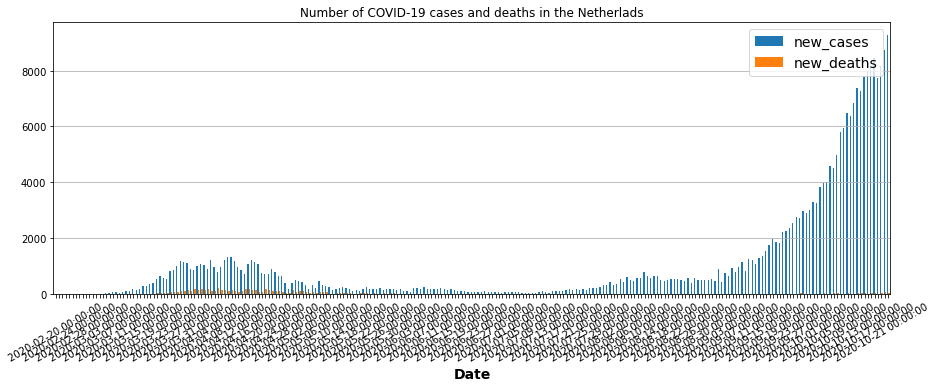

In [14]:
fig, ax = plt.subplots(figsize=(20,5))
df_nl[['new_cases', 'new_deaths']][begin_date.date():].plot(kind='bar', ax=ax, width=0.8, legend=True)
# fewer date ticks
every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.title("Number of COVID-19 cases and deaths in the Netherlads")
plt.legend(loc='upper right', prop={'size': 14})
plt.xlabel('Date', fontsize=14, fontweight="bold")
plt.grid(axis='y') 
plt.xticks(rotation=30)
plt.show()

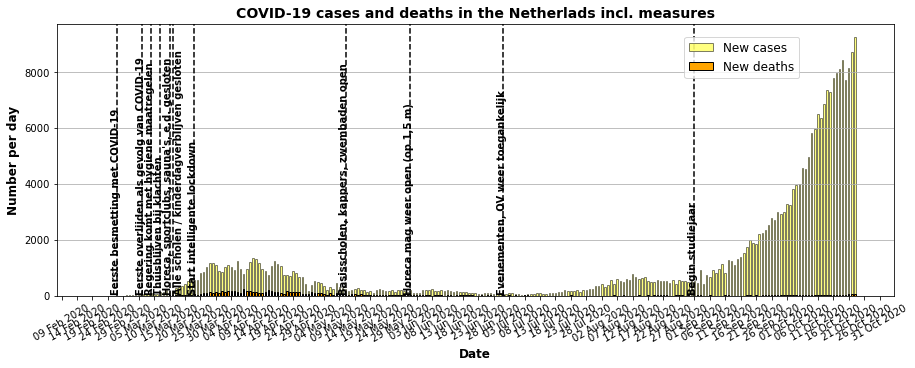

In [15]:
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(df_nl[begin_date.date():].index, df_nl[begin_date.date():]['new_cases'], width=0.5, alpha=0.5, color='yellow', edgecolor='black', align='center', label='New cases')
ax.bar(df_nl[begin_date.date():].index, df_nl[begin_date.date():]['new_deaths'], width=0.5, alpha=1.0, color='orange', edgecolor='black', align='center', label='New deaths')
# add timeline measures in NL 
for date, measure in zip(tmnl.Datum, tmnl.Beschrijving):
    ax.axvline(x=date.date(), ymax=df_nl['new_cases'].max(), color='black', linestyle='--')
    ax.text(date-timedelta(days=2)+(measure == "Alle scholen / kinderdagverblijven gesloten")*timedelta(days=2.5) \
            , 100, measure, color='black', fontsize=10, weight='heavy', rotation=90)
plt.title("COVID-19 cases and deaths in the Netherlads incl. measures", fontsize=14, fontweight="bold")
plt.legend(loc=(0.75, 0.8), prop={'size': 12})
plt.xlabel('Date', fontsize=12, fontweight="bold")
plt.ylabel('Number per day', fontsize=12, fontweight="bold")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
plt.xticks(rotation=30)
plt.grid(axis='y') 
if platform.system() == 'Windows':
    filename = "plots\covid-19_nl_incl_maatregelen.pdf"
else:
    filename = "plots/covid-19_nl_incl_maatregelen.pdf"
plt.savefig(filename, papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

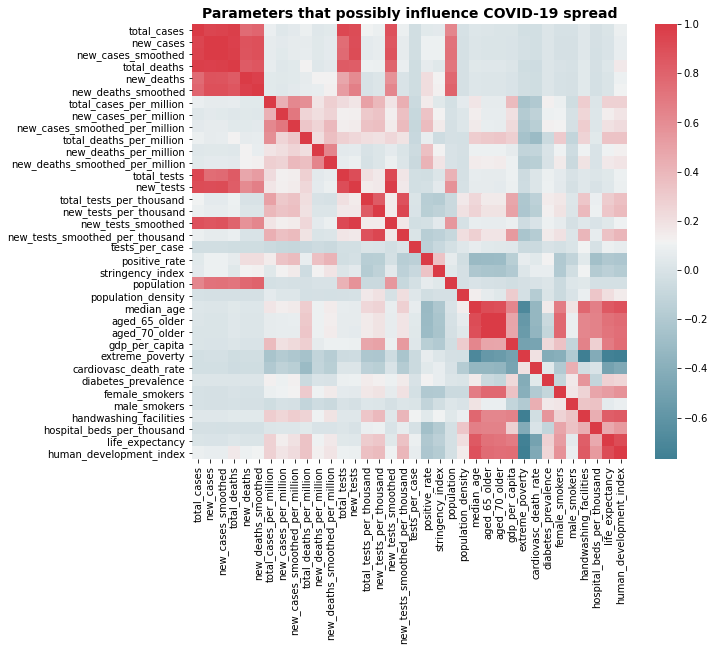

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr(method='pearson')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("Parameters that possibly influence COVID-19 spread", fontsize=14, fontweight="bold")
if platform.system() == 'Windows':
    filename = "plots\covid-19_parameters.pdf"
else:
    filename = "plots/covid-19_parameters.pdf"
plt.savefig(filename, papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

# Interactive plots

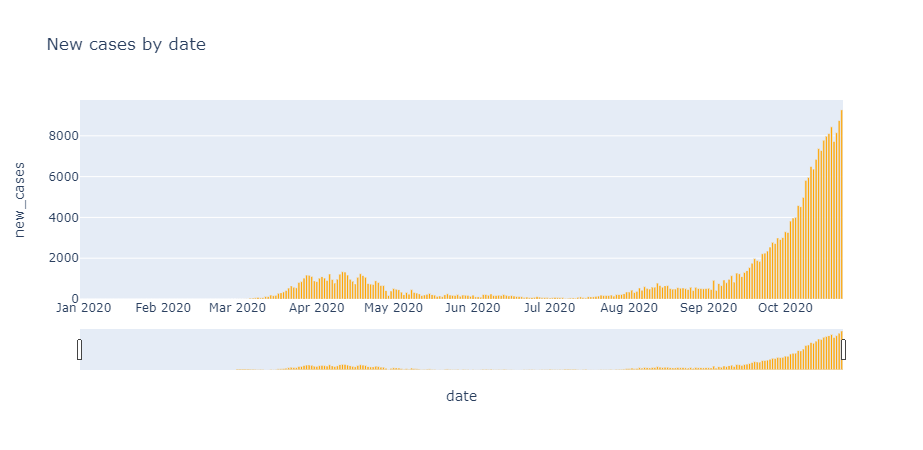

In [17]:
fig = px.bar(df_nl, x = df_nl.index, y = 'new_cases', title='New cases by date')
fig.update_traces(marker_color='orange')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

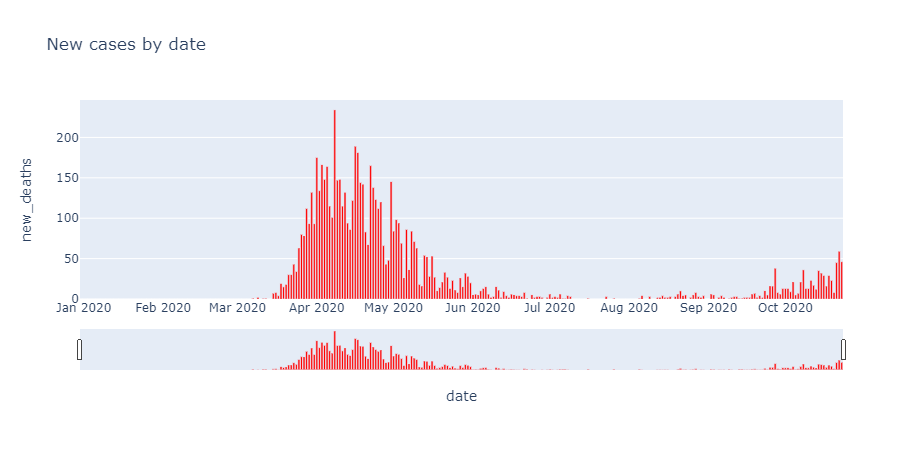

In [18]:
fig = px.bar(df_nl, x = df_nl.index, y = 'new_deaths', title='New cases by date')
fig.update_traces(marker_color='red')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# RIVM data

In [39]:
!wget -qNP data https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.csv

In [67]:
# linux path
filename = Path("data/COVID-19_aantallen_gemeente_per_dag.csv").resolve()
# windows path
if platform.system() == 'Windows':
    filename = PureWindowsPath(filename)

df = pd.read_csv(filename, sep=';', parse_dates=[0, 1], infer_datetime_format=True)
df.head()

Date_of_report Date_of_publication Municipality_code Municipality_name  \
0 2020-10-23 10:00:00 2020-02-27           GM0003            Appingedam         
1 2020-10-23 10:00:00 2020-02-27           GM0010            Delfzijl           
2 2020-10-23 10:00:00 2020-02-27           GM0014            Groningen          
3 2020-10-23 10:00:00 2020-02-27           GM0024            Loppersum          
4 2020-10-23 10:00:00 2020-02-27           GM0034            Almere             

    Province Security_region_code Security_region_name  \
0  Groningen  VR01                 Groningen             
1  Groningen  VR01                 Groningen             
2  Groningen  VR01                 Groningen             
3  Groningen  VR01                 Groningen             
4  Flevoland  VR25                 Flevoland             

  Municipal_health_service                        ROAZ_region  Total_reported  \
0  GGD Groningen            Acute Zorgnetwerk Noord Nederland  0                
1  GGD Groningen            Acute Zorgnetwerk Noord Nederland  0                
2  GGD Groningen            Acute Zorgnetwerk Noord Nederland  0                
3  GGD Groningen            Acute Zorgnetwerk Noord Nederland  0                
4  GGD Flevoland            SpoedZorgNet                       0                

   Hospital_admission  Deceased  
0  0                   0         
1  0                   0         
2  0                   0         
3  0                   0         
4  0                   0

In [151]:
gemeenten = ['Amsterdam', 'Rotterdam', 'Utrecht']
#features = ['Total_reported', 'Hospital_admission', 'Deceased']
features = 'Total_reported'
df_sum = df[df.Municipality_name.isin(gemeenten)].groupby(['Date_of_publication', 'Municipality_name'])[features].sum().unstack()
df_sum.tail()

Municipality_name    Amsterdam  Rotterdam  Utrecht
Date_of_publication                               
2020-10-19           536        545        315    
2020-10-20           698        495        210    
2020-10-21           759        477        181    
2020-10-22           806        679        248    
2020-10-23           743        558        290

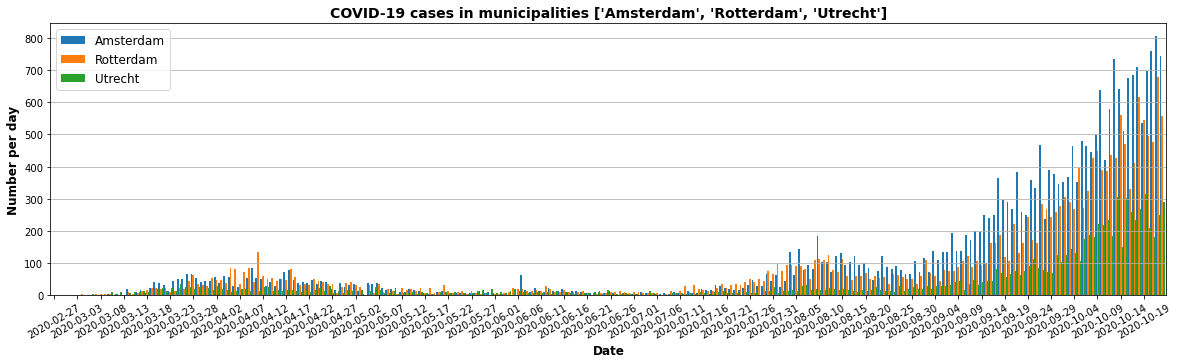

In [150]:
ax = df_sum[begin_date.date():].plot.bar(figsize=(20,5), width=1.2)
plt.title(f"COVID-19 cases in municipalities {gemeenten}", fontsize=14, fontweight="bold")
plt.legend(loc='best', prop={'size': 12})
plt.xlabel('Date', fontsize=12, fontweight="bold")
plt.ylabel('Number per day', fontsize=12, fontweight="bold")
ax.set_xticks(range(0,len(df_sum), 5));
ax.set_xticklabels(["%s" % item for item in df_sum.index.get_level_values(0).date.tolist()[::5]], rotation=30);
plt.grid(axis='y') 
plt.show()

In [134]:
# ax = df_sum.query('Date_of_publication > @begin_date').plot.bar(figsize=(20,5), width=1.2)
# plt.title(f"COVID-19 cases in municipality {gemeente}", fontsize=14, fontweight="bold")
# plt.legend(loc='best', prop={'size': 12})
# plt.xlabel('Date', fontsize=12, fontweight="bold")
# plt.ylabel('Number per day', fontsize=12, fontweight="bold")
# ax.set_xticks(range(0,len(df_sum), 5));
# ax.set_xticklabels(["%s" % item for item in df_sum.index.get_level_values(0).date.tolist()[::5]], rotation=30);
# plt.grid(axis='y') 
# plt.show()

# Predictive modelling

### II. NL (forecasting with sktime)

In [20]:
df_nl.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  239.000000     298.000000   292.000000          231.000000     
mean   58667.933054   879.560403   809.552818          5063.831169    
std    48794.307201   1741.447439  1560.516416         2051.819651    
min    1.000000       0.000000     0.000000            1.000000       
25%    38045.000000   53.750000    62.214500           5021.500000    
50%    49914.000000   209.000000   196.286000          6107.000000    
75%    66776.000000   792.500000   800.428750          6202.000000    
max    262109.000000  9268.000000  8342.429000         6909.000000    

       new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  298.000000  292.000000           239.000000                
mean   23.184564   23.245092            3423.890757               
std    43.030756   40.833760            2847.660868               
min    0.000000    0.000000             0.058000                  
25%    0.000000    0.143000             2220.326000               
50%    3.000000    3.143000             2913.007000               
75%    21.000000   20.321750            3897.082000               
max    234.000000  153.571000           15296.816000              

       new_cases_per_million  new_cases_smoothed_per_million  \
count  298.000000             292.000000                       
mean   51.331574              47.245921                        
std    101.631745             91.072541                        
min    0.000000               0.000000                         
25%    3.136750               3.630750                         
50%    12.197000              11.455000                        
75%    46.250500              46.713500                        
max    540.885000             486.868000                       

       total_deaths_per_million  new_deaths_per_million  \
count  231.000000                298.000000               
mean   295.527814                1.353057                 
std    119.745273                2.511265                 
min    0.058000                  0.000000                 
25%    293.057500                0.000000                 
50%    356.408000                0.175000                 
75%    361.951500                1.226000                 
max    403.213000                13.656000                

       new_deaths_smoothed_per_million   total_tests  new_tests  \
count  292.000000                       3.200000e+01  0.0         
mean   1.356565                         9.911008e+05 NaN          
std    2.383092                         9.264149e+05 NaN          
min    0.000000                         1.708000e+04 NaN          
25%    0.008000                         2.604265e+05 NaN          
50%    0.183000                         6.508190e+05 NaN          
75%    1.186000                         1.537627e+06 NaN          
max    8.963000                         3.104195e+06 NaN          

       total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
count  32.000000                 0.0                     211.000000           
mean   57.841000                NaN                      14189.739336         
std    54.066077                NaN                      9780.989681          
min    0.997000                 NaN                      3048.000000          
25%    15.198750                NaN                      5131.500000          
50%    37.982000                NaN                      9951.000000          
75%    89.736750                NaN                      24755.500000         
max    181.162000               NaN                      32672.000000         

       new_tests_smoothed_per_thousand  tests_per_case  positive_rate  \
count  211.000000                       211.000000      211.000000      
mean   0.828128                         44.772280       0.073199        
std    0.570812                         48.853138       0.075474        
min    0.178000                         3.712000

In [21]:
print("% of nan values per column")
for column in df_nl.columns:
    print(f"{column}: {df_nl[column].isna().sum()} / {len(df_nl)}")

% of nan values per column
iso_code: 0 / 298
continent: 0 / 298
location: 0 / 298
total_cases: 59 / 298
new_cases: 0 / 298
new_cases_smoothed: 6 / 298
total_deaths: 67 / 298
new_deaths: 0 / 298
new_deaths_smoothed: 6 / 298
total_cases_per_million: 59 / 298
new_cases_per_million: 0 / 298
new_cases_smoothed_per_million: 6 / 298
total_deaths_per_million: 67 / 298
new_deaths_per_million: 0 / 298
new_deaths_smoothed_per_million: 6 / 298
total_tests: 266 / 298
new_tests: 298 / 298
total_tests_per_thousand: 266 / 298
new_tests_per_thousand: 298 / 298
new_tests_smoothed: 87 / 298
new_tests_smoothed_per_thousand: 87 / 298
tests_per_case: 87 / 298
positive_rate: 87 / 298
tests_units: 80 / 298
stringency_index: 2 / 298
population: 0 / 298
population_density: 0 / 298
median_age: 0 / 298
aged_65_older: 0 / 298
aged_70_older: 0 / 298
gdp_per_capita: 0 / 298
extreme_poverty: 298 / 298
cardiovasc_death_rate: 0 / 298
diabetes_prevalence: 0 / 298
female_smokers: 0 / 298
male_smokers: 0 / 298
handwashing

In [22]:
data = df_nl.drop(['iso_code', 'continent', 'location', 'new_tests', 'new_tests_per_thousand', 'total_tests', 'total_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'extreme_poverty', 'handwashing_facilities'], axis=1)

In [23]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting.forecasting import plot_ys

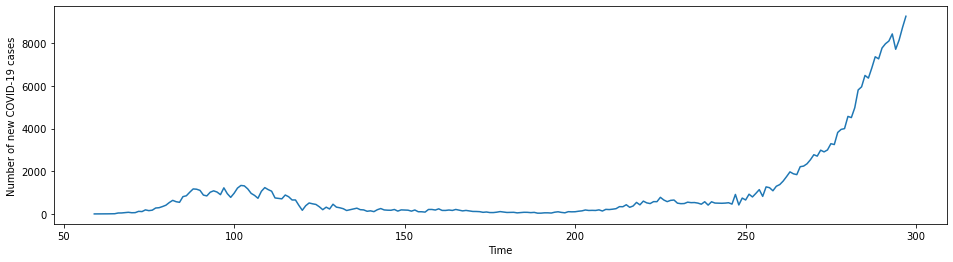

In [24]:
y = df_nl.reset_index()['new_cases']
y = y[y>0]
fig, ax = plot_ys(y)
ax.set(xlabel="Time", ylabel="Number of new COVID-19 cases");

219 20


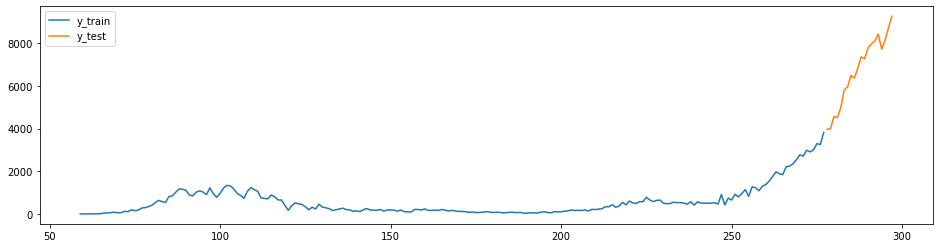

In [25]:
y_train, y_test = temporal_train_test_split(y, test_size=20)
plot_ys(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [26]:
fh = np.arange(len(y_test)) + 1

0.513047533043365

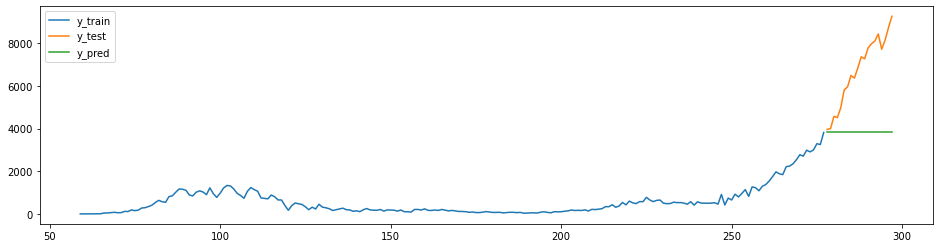

In [27]:
from sktime.forecasting.compose import ReducedRegressionForecaster
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=12, strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



0.19185420084231392

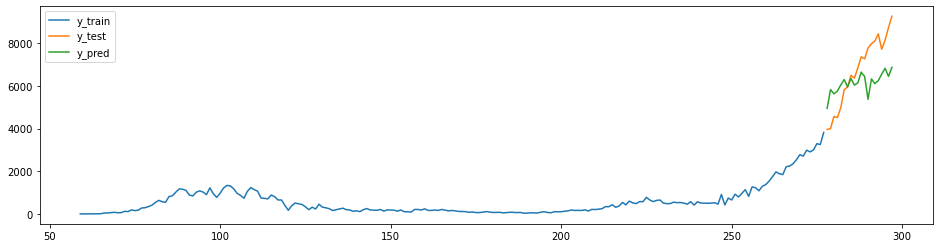

In [28]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend="add", seasonal="multiplicative", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

0.24236647324147048

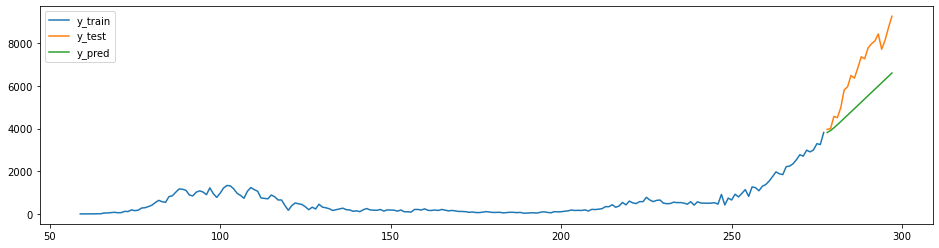

In [29]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

0.293145481175862

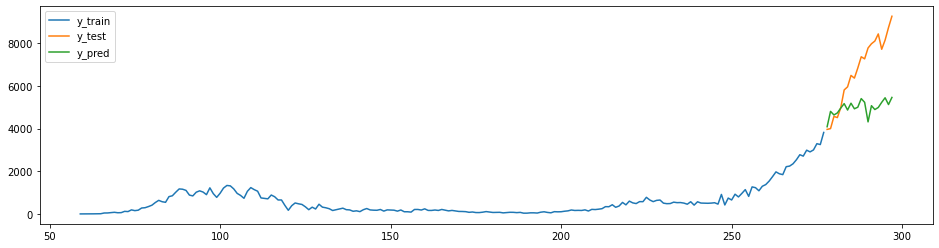

In [30]:
from sktime.forecasting.compose import EnsembleForecaster
forecaster = EnsembleForecaster([
    ("ses", ExponentialSmoothing(seasonal="multiplicative", sp=12)),
    ("holt", ExponentialSmoothing(trend="add", damped=False, seasonal="multiplicative", sp=12)),
    ("damped", ExponentialSmoothing(trend="add", damped=True, seasonal="multiplicative", sp=12))
])
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [31]:
from sktime.forecasting.model_selection import SlidingWindowSplitter, ForecastingGridSearchCV

forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=15, strategy="recursive")
param_grid = {"window_length": [5, 10, 15]}

# we fit the forecaster on the initial window, and then use temporal cross-validation to find the optimal parameter
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv.fit(y_train)
y_pred = gscv.predict(fh)

0.513047533043365

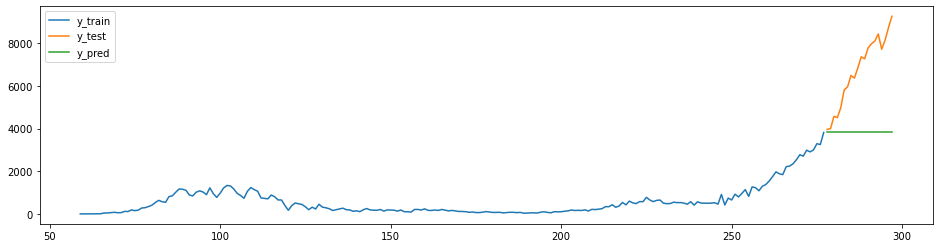

In [32]:
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [33]:
gscv.best_params_

{'window_length': 5}

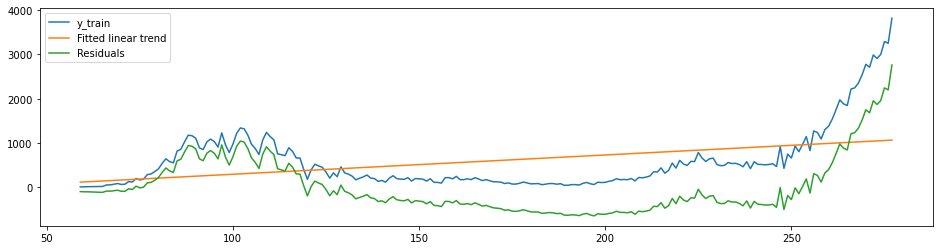

In [34]:
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformers.single_series.detrend import Detrender

# liner detrending
forecaster = PolynomialTrendForecaster(degree=1)
transformer = Detrender(forecaster=forecaster)
yt = transformer.fit_transform(y_train)

# internally, the Detrender uses the in-sample predictions of the PolynomialTrendForecaster
forecaster = PolynomialTrendForecaster(degree=1)
fh_ins = -np.arange(len(y_train)) # in-sample forecasting horizon
y_pred = forecaster.fit(y_train).predict(fh=fh_ins)

plot_ys(y_train, y_pred, yt, labels=["y_train", "Fitted linear trend", "Residuals"]);

0.5007492563234359

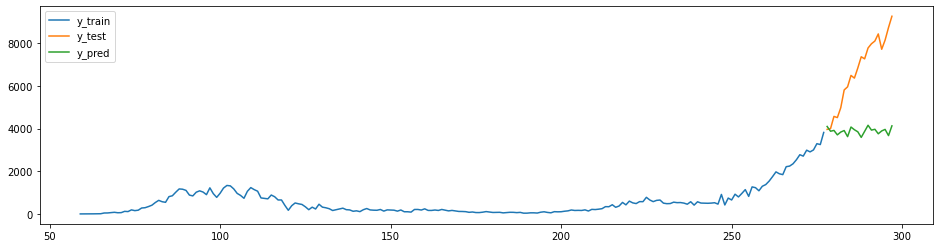

In [35]:
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformers.single_series.detrend import Deseasonalizer

forecaster = TransformedTargetForecaster([
    ("deseasonalise", Deseasonalizer(model="multiplicative", sp=12)),
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
    ("forecast", ReducedRegressionForecaster(regressor=regressor, window_length=15, strategy="recursive"))
])
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [36]:
from sktime.forecasting.naive import NaiveForecaster
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
cv = SlidingWindowSplitter(fh=1)
y_pred = forecaster.update_predict(y_test, cv)
smape_loss(y_test, y_pred)

0.057657337370865

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

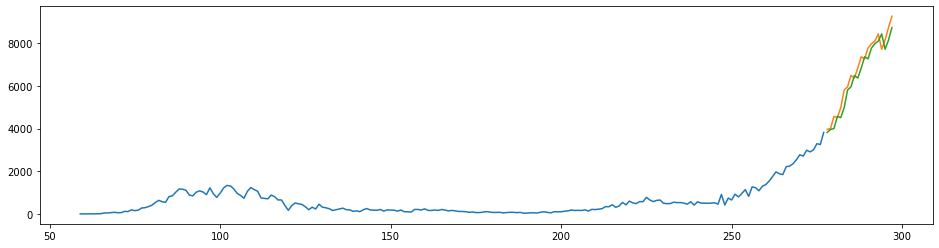

In [37]:
plot_ys(y_train, y_test, y_pred)

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



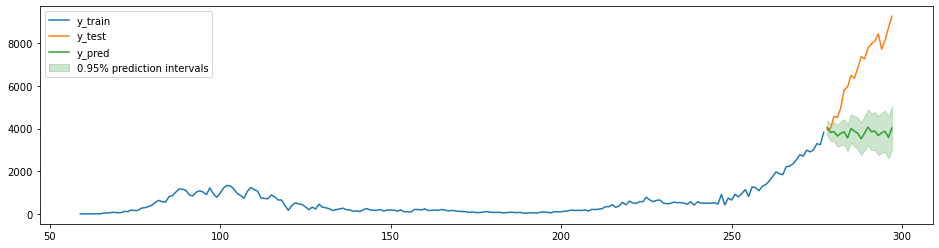

In [38]:
from sktime.forecasting.theta import ThetaForecaster
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)
alpha = 0.05  # 95% prediction intervals
y_pred, pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)
smape_loss(y_test, y_pred)

fig, ax = plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(y_pred.index, pred_ints["lower"], pred_ints["upper"], alpha=0.2, color="green", label=f"{1 - alpha}% prediction intervals")
plt.legend();